# Capstone Project 2- Group 6

#### Memebers of the Group: 

##### Aarti Aarti (Student ID:0833015 )
##### Neha Kumari (Student ID:0824764)
##### Sai Sri Kalyani Narapareddy (Student ID: 0827890)
##### Unnati Gawde (Student ID:0825955 )
##### Vikrant Siwach (Student ID:0824836 )

## Importing required libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### EDA and Univariate Analysis

#### Gender

In [2]:
# Loading dataset
df_gender = pd.read_excel('gender_data.xlsx')

print(df_gender.head())

                    PROVINCE  Gender  Year Total
0  Newfoundland and Labrador  Female  2015   555
1  Newfoundland and Labrador    Male  2015   565
2       Prince Edward Island  Female  2015   590
3       Prince Edward Island    Male  2015   600
4                Nova Scotia  Female  2015  1675


In [3]:
# checking basic information on columns and dtype
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PROVINCE  333 non-null    object
 1   Gender    324 non-null    object
 2   Year      333 non-null    int64 
 3   Total     333 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.5+ KB


In [4]:
# Check for missing values with another method
print(df_gender.isnull().sum())

PROVINCE    0
Gender      9
Year        0
Total       0
dtype: int64


In [5]:
df_gender.describe()

,Year
count,333.000000
mean,2019.000000
std,2.585875
min,2015.000000
25%,2017.000000
50%,2019.000000
75%,2021.000000
max,2023.000000


cleaning missing and invalid values

In [6]:
#changing '--' to zero and dtype of column
df_gender['Total'] = df_gender['Total'].replace('--', 0).astype(int)
df_gender['Year'] = df_gender['Year'].astype('category')
#cleaning 9 mising values
df_gender = df_gender.dropna()

In [7]:
#filtering gender column for better visualisation
df_gender = df_gender[df_gender['Gender'].isin(['Male', 'Female'])]

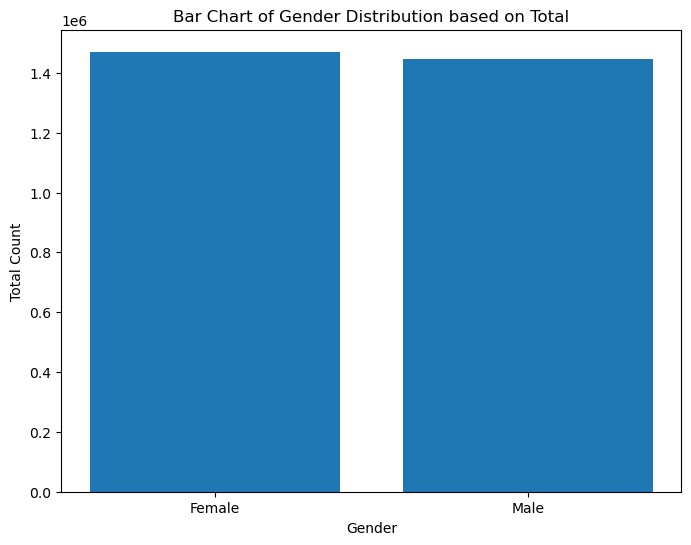

In [8]:
# Assuming 'Total' is the column you want to use for gender distribution
# Assuming 'Gender' has only two unique values: 'Female' and 'Male'
gender_distribution = df_gender.groupby('Gender')['Total'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(gender_distribution.index, gender_distribution.values)

plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.title('Bar Chart of Gender Distribution based on Total')
plt.show()


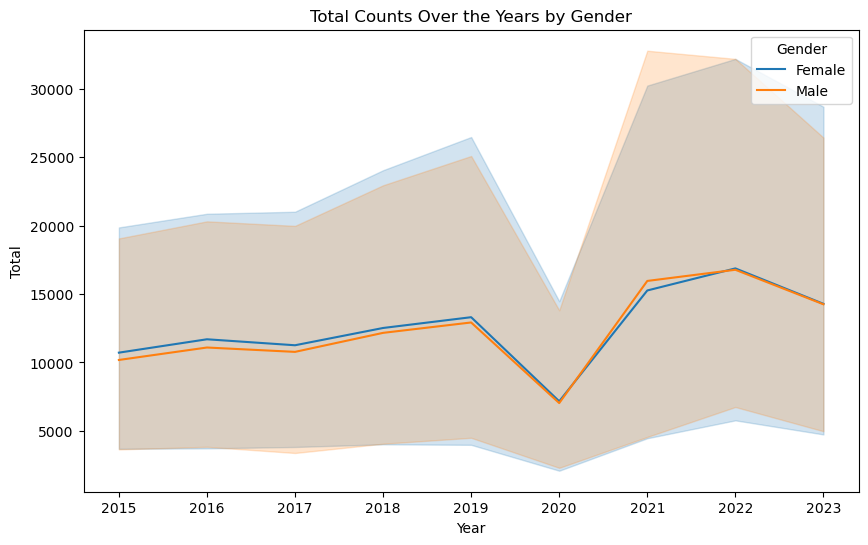

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total', hue='Gender', data=df_gender)
plt.title('Total Counts Over the Years by Gender')
plt.show()


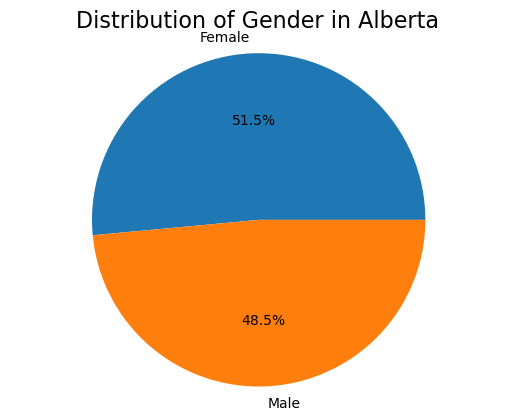

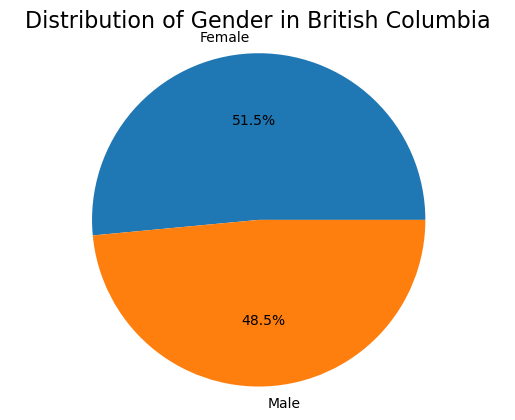

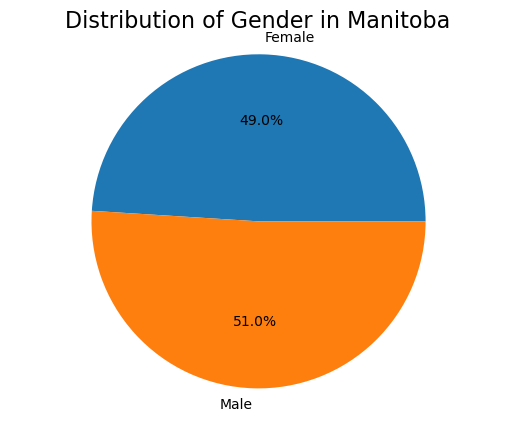

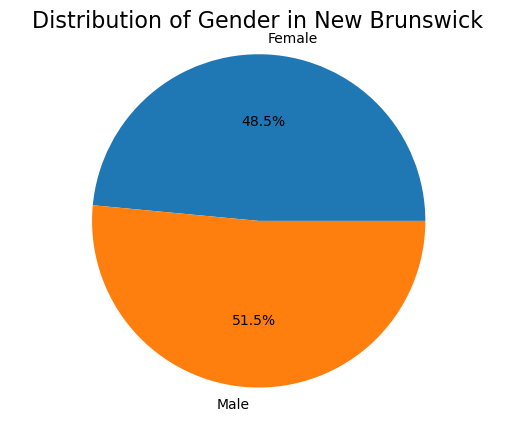

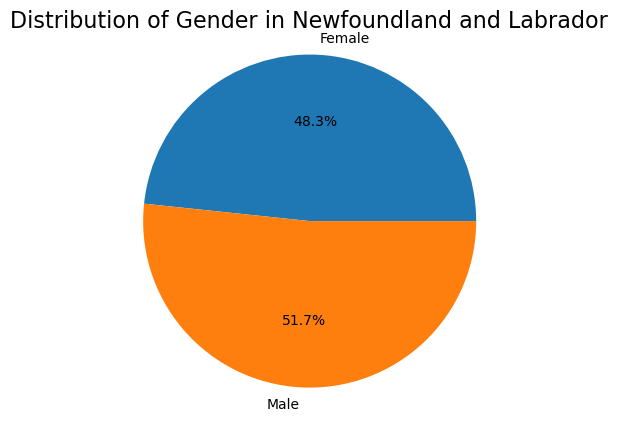

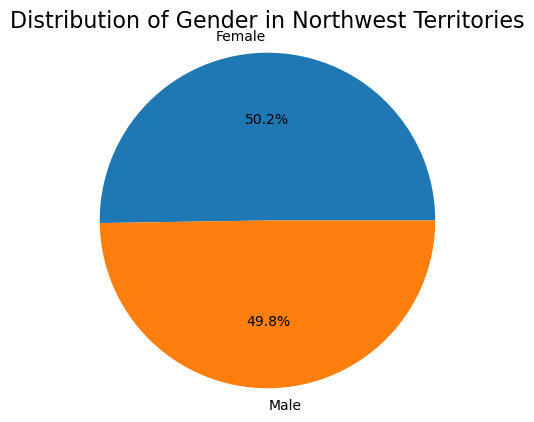

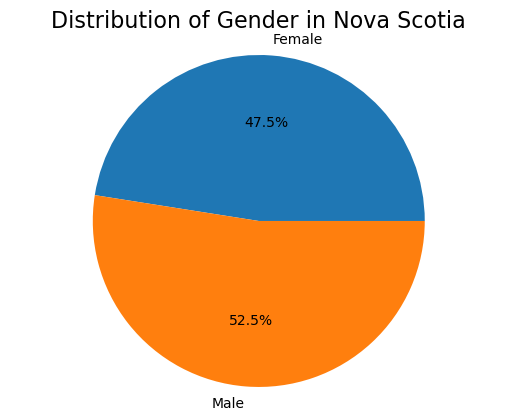

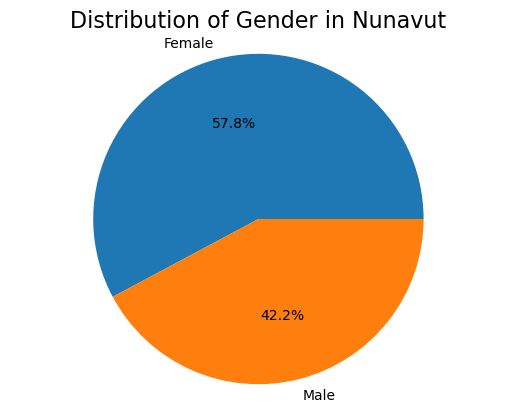

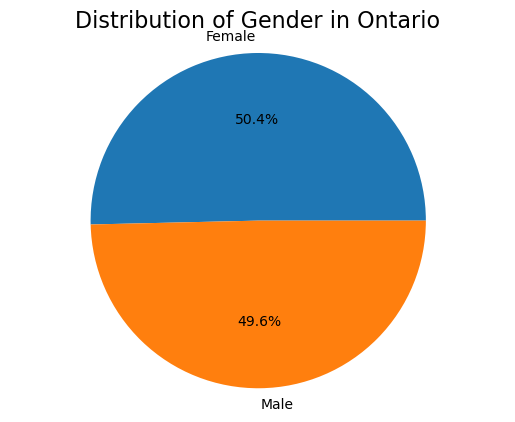

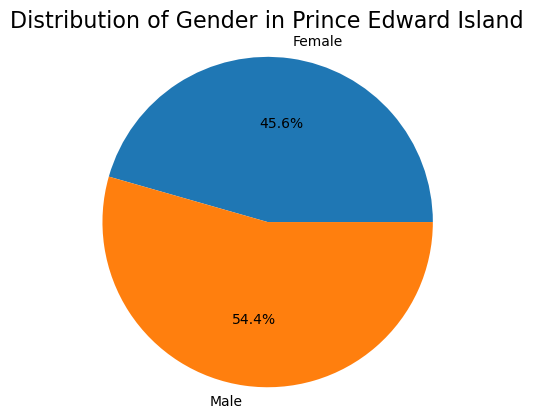

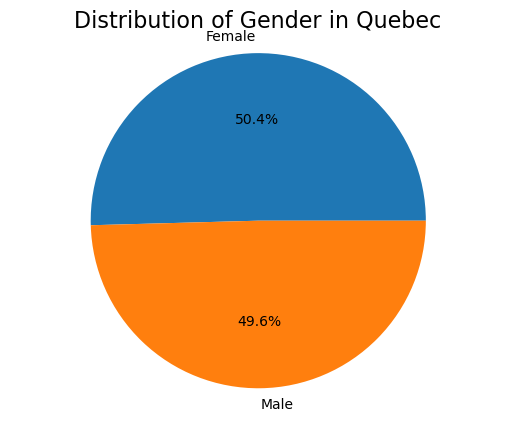

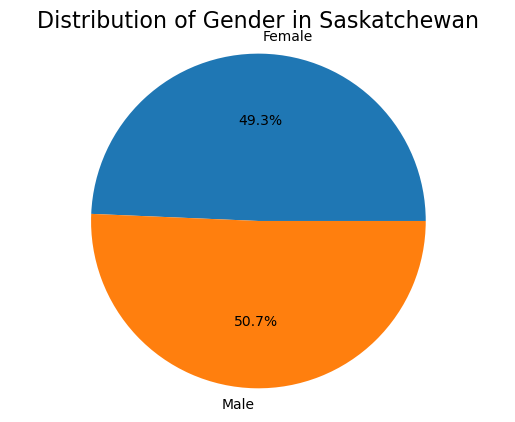

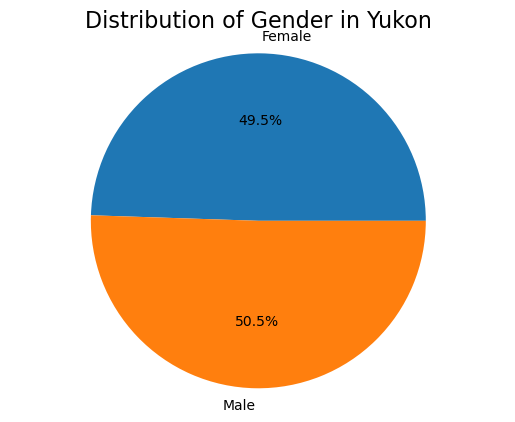

In [10]:
# Create a pivot table to aggregate Total counts for each gender and province
pivot_table = df_gender.pivot_table(index='PROVINCE', columns='Gender', values='Total', aggfunc='sum', fill_value=0)

# Plotting the pie chart for each province
provinces = pivot_table.index

for province in provinces:
    gender_counts = pivot_table.loc[province]
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of Gender in {province}', fontsize=16)
    plt.axis('equal')
    plt.show()

In [11]:
# Province-wise Analysis
province_summary = df_gender.groupby('PROVINCE').describe()
province_summary.T

PROVINCE          Alberta  British Columbia      Manitoba  New Brunswick  \
Total count     18.000000         18.000000     18.000000      18.000000   
      mean   21097.500000      23443.888889   8170.833333    2679.722222   
      std     3937.625908       6501.346819   1837.561724    1219.965612   
      min    11090.000000      13900.000000   4205.000000    1275.000000   
      25%    20060.000000      18432.500000   7423.750000    1822.500000   
      50%    21945.000000      22422.500000   8090.000000    2380.000000   
      75%    23596.250000      27972.500000   9465.000000    3041.250000   
      max    25445.000000      35160.000000  11085.000000    5260.000000   

PROVINCE     Newfoundland and Labrador  Northwest Territories  Nova Scotia  \
Total count                  18.000000              18.000000    18.000000   
      mean                  973.611111             112.777778  3409.722222   
      std                   560.839197              28.605955  1504.602226   
      min                   440.000000              60.000000  1675.000000   
      25%                   576.250000              92.500000  2218.750000   
      50%                   762.500000             117.500000  2992.500000   
      75%                  1075.000000             128.750000  4218.750000   
      max                  2160.000000             170.000000  6760.000000   

PROVINCE       Nunavut        Ontario  Prince Edward Island        Quebec  \
Total count  18.000000      18.000000             18.000000     18.000000   
      mean   17.777778   69235.000000           1099.166667  24147.500000   
      std     5.995641   19244.566384            304.685228   5639.055316   
      min    10.000000   41270.000000            545.000000  12370.000000   
      25%    15.000000   53885.000000           1008.750000  22042.500000   
      50%    17.500000   68715.000000           1135.000000  25125.000000   
      75%    20.000000   81772.500000           1295.000000  26160.000000   
      max    30.000000  103375.000000           1525.000000  34445.000000   

PROVINCE     Saskatchewan       Yukon  
Total count     18.000000   18.000000  
      mean    7418.611111  185.277778  
      std     2111.669820   88.624658  
      min     3680.000000   80.000000  
      25%     6223.750000  115.000000  
      50%     7482.500000  155.000000  
      75%     7942.500000  236.250000  
      max    10970.000000  350.000000

In [12]:
# Drop Total for final file

#### AGE

In [13]:
# Load your dataset
df_age = pd.read_excel('age_data.xlsx')

# Display the first few rows of the dataset
df_age.head()

,AGE GROUP,Province,Year,Total
0,0 to 14 years old,Newfoundland and Labrador,2015,295
1,15 to 29 years old,Newfoundland and Labrador,2015,270
2,30 to 44 years old,Newfoundland and Labrador,2015,445
3,45 to 59 years old,Newfoundland and Labrador,2015,90
4,60 to 74 years old,Newfoundland and Labrador,2015,15


In [14]:
df_age['Year'] = df_age['Year'].astype('category')

In [15]:
df_age.describe()

,Total
count,674.000000
mean,4203.123145
std,9241.880710
min,0.000000
25%,50.000000
50%,602.500000
75%,3965.000000
max,90245.000000


In [16]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AGE GROUP  674 non-null    object  
 1   Province   674 non-null    object  
 2   Year       674 non-null    category
 3   Total      674 non-null    int64   
dtypes: category(1), int64(1), object(2)
memory usage: 16.9+ KB


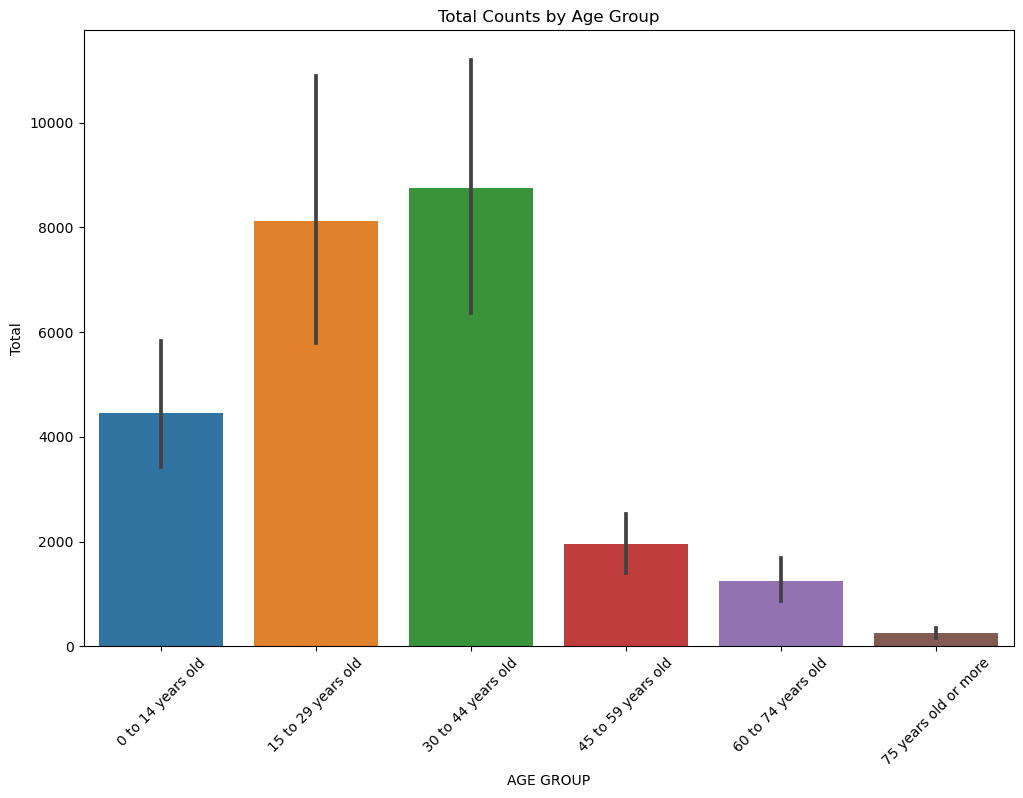

In [17]:
# Total Counts by Province
plt.figure(figsize=(12, 8))
sns.barplot(x='AGE GROUP', y='Total', data=df_age)
plt.title('Total Counts by Age Group')
plt.xticks(rotation=45)
plt.show()

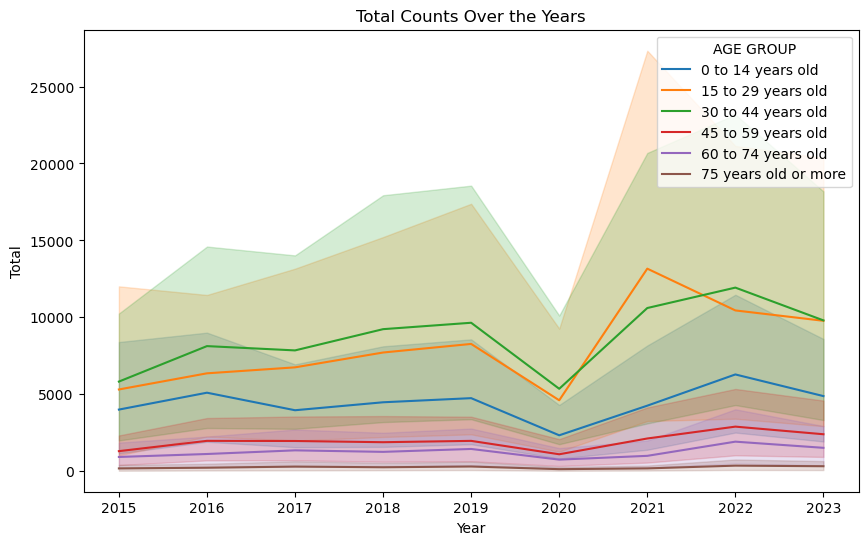

In [18]:
# Total Counts Over the Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total',hue='AGE GROUP', data=df_age)
plt.title('Total Counts Over the Years')
plt.show()

In [19]:
# Province-wise Analysis
province_summary = df_age.groupby('Province').describe()

province_summary.T

Province          Alberta  British Columbia     Manitoba  New Brunswick  \
Total count     53.000000         44.000000    44.000000      53.000000   
      mean    6920.943396       8845.227273  3320.113636     897.169811   
      std     5901.498185       7818.428064  2364.737679     953.716168   
      min       20.000000        190.000000   280.000000       0.000000   
      25%     1880.000000       3558.750000  1017.500000      60.000000   
      50%     3970.000000       6007.500000  3657.500000     600.000000   
      75%    13735.000000      13621.250000  5218.750000    1500.000000   
      max    19055.000000      31810.000000  8175.000000    3680.000000   

Province     Newfoundland and Labrador  Northwest Territories  Nova Scotia  \
Total count                  54.000000              54.000000    54.000000   
      mean                  324.259259              37.222222  1136.851852   
      std                   378.161400              40.836382  1232.500257   
      min                     0.000000               0.000000    10.000000   
      25%                    30.000000               5.000000   112.500000   
      50%                   230.000000              25.000000   752.500000   
      75%                   441.250000              55.000000  1751.250000   
      max                  1655.000000             165.000000  4630.000000   

Province       Nunavut       Ontario  Prince Edward Island        Quebec  \
Total count  54.000000     52.000000             54.000000     53.000000   
      mean    6.388889  23044.230769            366.111111   7947.924528   
      std     6.020144  21630.894989            378.585583   6913.310353   
      min     0.000000    830.000000              0.000000    145.000000   
      25%     0.000000   6672.500000             20.000000   1810.000000   
      50%     5.000000  13675.000000            310.000000   5265.000000   
      75%    10.000000  33133.750000            597.500000  12945.000000   
      max    20.000000  90245.000000           1530.000000  26060.000000   

Province     Saskatchewan       Yukon  
Total count     53.000000    52.00000  
      mean    2524.150943   556.25000  
      std     2273.858280   911.98226  
      min       50.000000    10.00000  
      25%      345.000000    43.75000  
      50%     1870.000000   140.00000  
      75%     3950.000000   508.75000  
      max     8295.000000  3700.00000

#### Profession

In [20]:
# Load your dataset
df_occ = pd.read_excel('occ_data.xlsx')

# Display the first few rows of the dataset
df_occ.head()

,Province,Occupation,Year,Total
0,Newfoundland and Labrador,0012 - Senior government managers and officials,2015,0
1,Newfoundland and Labrador,"0013 - Senior managers - financial, communicat...",2015,0
2,Newfoundland and Labrador,"0014 - Senior managers - health, education, so...",2015,0
3,Newfoundland and Labrador,"0016 - Senior managers - construction, transpo...",2015,0
4,Newfoundland and Labrador,0111 - Financial managers,2015,0


In [21]:
df_occ['Year'] = df_occ['Year'].astype('category')
df_occ = df_occ[df_occ['Occupation'] != 'Other occupations']

In [22]:
df_occ.describe()


,Total
count,40878.000000
mean,137.109325
std,4548.720951
min,0.000000
25%,0.000000
50%,0.000000
75%,10.000000
max,355865.000000


In [23]:
df_occ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40878 entries, 0 to 40994
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Province    40878 non-null  object  
 1   Occupation  40743 non-null  object  
 2   Year        40878 non-null  category
 3   Total       40878 non-null  int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.3+ MB


cleaning missing and invalid values

In [24]:
# Check for missing values with another method
print(df_occ.isnull().sum())

Province        0
Occupation    135
Year            0
Total           0
dtype: int64


In [25]:
df_occ = df_occ.dropna()

In [26]:
df_occ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40743 entries, 0 to 40990
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Province    40743 non-null  object  
 1   Occupation  40743 non-null  object  
 2   Year        40743 non-null  category
 3   Total       40743 non-null  int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.3+ MB


In [27]:
df_occ.head()

,Province,Occupation,Year,Total
0,Newfoundland and Labrador,0012 - Senior government managers and officials,2015,0
1,Newfoundland and Labrador,"0013 - Senior managers - financial, communicat...",2015,0
2,Newfoundland and Labrador,"0014 - Senior managers - health, education, so...",2015,0
3,Newfoundland and Labrador,"0016 - Senior managers - construction, transpo...",2015,0
4,Newfoundland and Labrador,0111 - Financial managers,2015,0


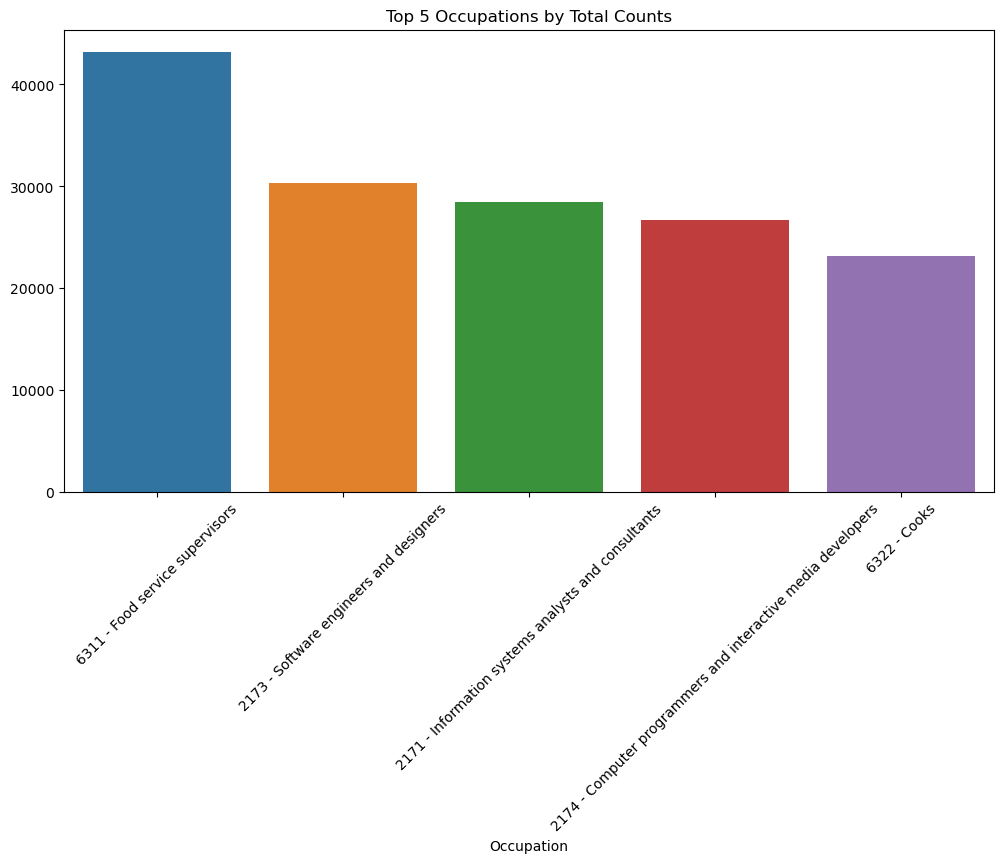

In [28]:
# Calculate total counts for each occupation

occupation_counts = df_occ.groupby('Occupation')['Total'].sum().sort_values(ascending=False)

top_5_occupations = occupation_counts.head(5)

# Plotting the top 5 occupations

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_occupations.index, y=top_5_occupations.values)
plt.title('Top 5 Occupations by Total Counts')
plt.xticks(rotation=45)
plt.show()

In [29]:
bottom_10_occupations = occupation_counts[(occupation_counts != 0) & (occupation_counts.notna())].tail(10)
bottom_10_occupations

Occupation
5245 - Patternmakers - textile, leather and fur products                   5
6533 - Casino occupations                                                  5
8262 - Fishermen/women                                                     5
7532 - Water transport deck and engine room crew                           5
6522 - Pursers and flight attendants                                       5
9611 - Labourers in mineral and metal processing                           5
9223 - Supervisors, electrical products manufacturing                      5
9414 - Concrete, clay and stone forming operators                          5
7522 - Public works maintenance equipment operators and related workers    5
9616 - Labourers in textile processing                                     5
Name: Total, dtype: int64

In [30]:
bottom_20_occupations = occupation_counts.dropna().tail(20)
bottom_20_occupations
# No values

Occupation
0823 - Managers in aquaculture                                               0
8441 - Fishing vessel deckhands                                              0
8422 - Silviculture and forestry workers                                     0
8421 - Chain saw and skidder operators                                       0
8411 - Underground mine service and support workers                          0
8261 - Fishing masters and officers                                          0
8231 - Underground production and development miners                         0
8211 - Supervisors, logging and forestry                                     0
7372 - Drillers and blasters - surface mining, quarrying and construction    0
7533 - Boat and cable ferry operators and related occupations                0
7531 - Railway yard and track maintenance workers                            0
1416 - Court clerks                                                          0
1423 - Desktop publishing operators and r

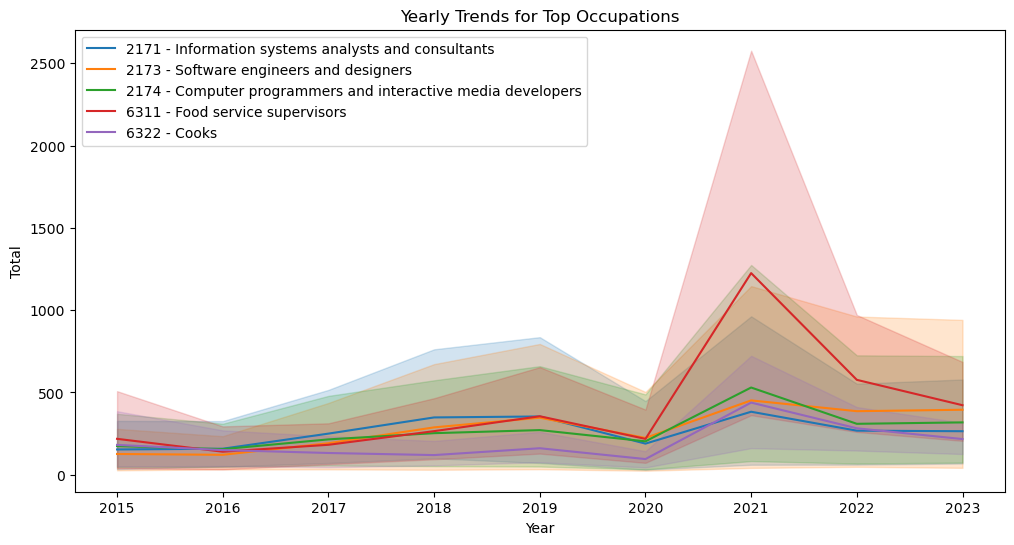

In [31]:
top_occupations = occupation_counts.head(5).index
df_top_occupations = df_occ[df_occ['Occupation'].isin(top_occupations)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', hue='Occupation', data=df_top_occupations)
plt.title('Yearly Trends for Top Occupations')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')  # Shift the legend to the top-left corner
plt.show()

In [32]:
# Province-wise Analysis
province_summary = df_occ.groupby('Province').describe()

province_summary.T

Province         Alberta  British Columbia     Manitoba  New Brunswick  \
Total count  4167.000000       4167.000000  4176.000000    3402.000000   
      mean     21.677466         33.305736    11.437979       3.883010   
      std      81.396056        112.327949    38.550193      17.717485   
      min       0.000000          0.000000     0.000000       0.000000   
      25%       0.000000          0.000000     0.000000       0.000000   
      50%       0.000000          5.000000     0.000000       0.000000   
      75%      15.000000         25.000000    10.000000       0.000000   
      max    1870.000000       3085.000000   670.000000     350.000000   

Province     Newfoundland and Labrador  Northwest Territories  Nova Scotia  \
Total count                2538.000000            1359.000000  3555.000000   
      mean                    1.790780               0.224430     6.205345   
      std                    12.165686               1.948631    30.861573   
      min                     0.000000               0.000000     0.000000   
      25%                     0.000000               0.000000     0.000000   
      50%                     0.000000               0.000000     0.000000   
      75%                     0.000000               0.000000     0.000000   
      max                   270.000000              35.000000   830.000000   

Province     Nunavut      Ontario  Prince Edward Island       Quebec  \
Total count    378.0  4329.000000           2763.000000  4419.000000   
      mean       0.0    82.346962              2.271082    22.176963   
      std        0.0   270.260475             11.918957    87.309526   
      min        0.0     0.000000              0.000000     0.000000   
      25%        0.0     0.000000              0.000000     0.000000   
      50%        0.0    10.000000              0.000000     0.000000   
      75%        0.0    50.000000              0.000000    15.000000   
      max        0.0  6985.000000            240.000000  2230.000000   

Province     Saskatchewan        Yukon  
Total count   3762.000000  1728.000000  
      mean      10.437267     0.619213  
      std       45.086863     4.337221  
      min        0.000000     0.000000  
      25%        0.000000     0.000000  
      50%        0.000000     0.000000  
      75%        5.000000     0.000000  
      max     1045.000000    85.000000

PR by country of origin

In [33]:
# Load your dataset
df_pr = pd.read_excel('PR By Country.xlsx')

# Display the first few rows of the dataset
df_pr.head()

,Country,Year,Total
0,Afghanistan,2015,"2,630"
1,Albania,2015,565
2,Algeria,2015,"2,830"
3,Andorra,2015,--
4,Angola,2015,30


In [34]:
# Convert 'Total' column to integers, replacing '--' with 0
# Replace non-finite values (NaN or inf) with 0
df_pr['Total'] = pd.to_numeric(df_pr['Total'].replace('--', '0').str.replace(',', ''), errors='coerce').fillna(0)
df_pr['Total'] = df_pr['Total'].astype(int)

df_pr['Year'] = df_pr['Year'].astype('category')

In [35]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  1735 non-null   object  
 1   Year     1767 non-null   category
 2   Total    1767 non-null   int32   
dtypes: category(1), int32(1), object(1)
memory usage: 22.9+ KB


Identifying and cleaning missing and invalid values

In [36]:
df_pr.isnull().sum()

Country    32
Year        0
Total       0
dtype: int64

In [37]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  1735 non-null   object  
 1   Year     1767 non-null   category
 2   Total    1767 non-null   int32   
dtypes: category(1), int32(1), object(1)
memory usage: 22.9+ KB


In [38]:
df_pr.describe()

,Total
count,1767.000000
mean,1440.212224
std,6316.241977
min,0.000000
25%,15.000000
50%,180.000000
75%,725.000000
max,127935.000000


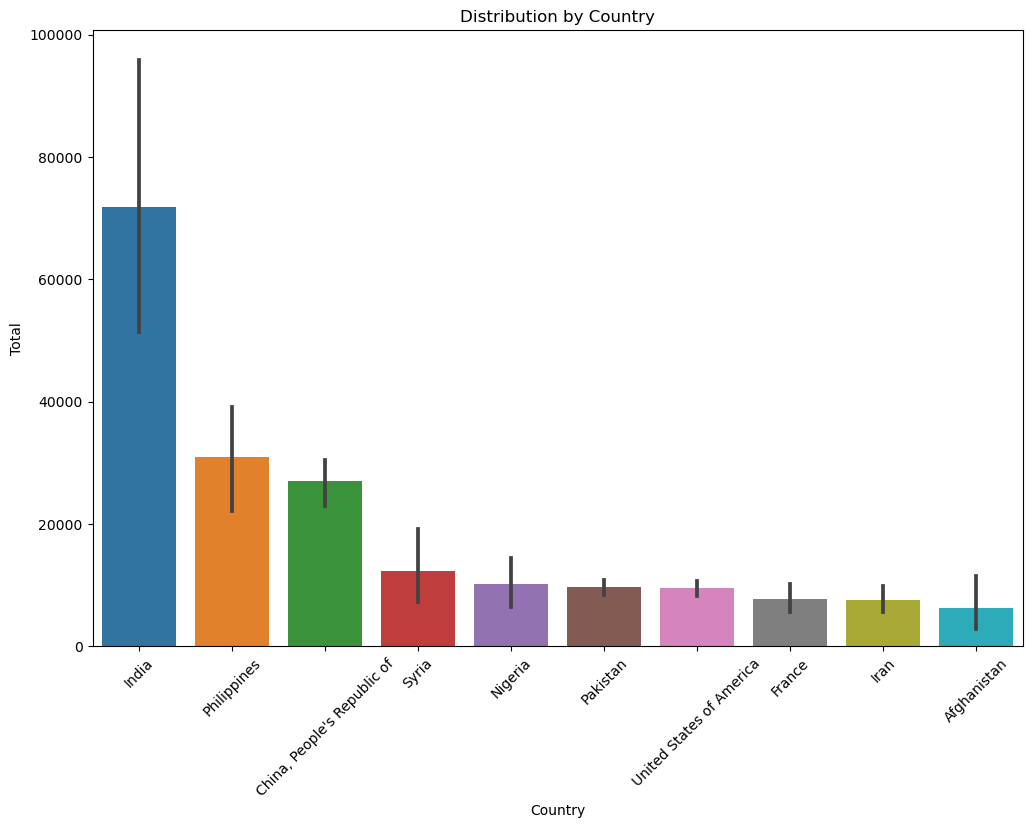

In [39]:
# making a subset of top 10 countries to see any trend
# Identify the top 10 and top 5 countries based on total counts
top_10_countries = df_pr.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10).index
top_5_countries = df_pr.groupby('Country')['Total'].sum().sort_values(ascending=False).head(5).index

# Filter the dataframe for the top 10 and top 5 countries
df_top_10_countries = df_pr[df_pr['Country'].isin(top_10_countries)]
df_top_5_countries = df_pr[df_pr['Country'].isin(top_5_countries)]

# Explore distribution by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y = 'Total', data=df_top_10_countries, order=df_top_10_countries.groupby('Country')['Total'].sum().sort_values(ascending=False).index)
plt.title('Distribution by Country')
plt.xticks(rotation=45)
plt.show()

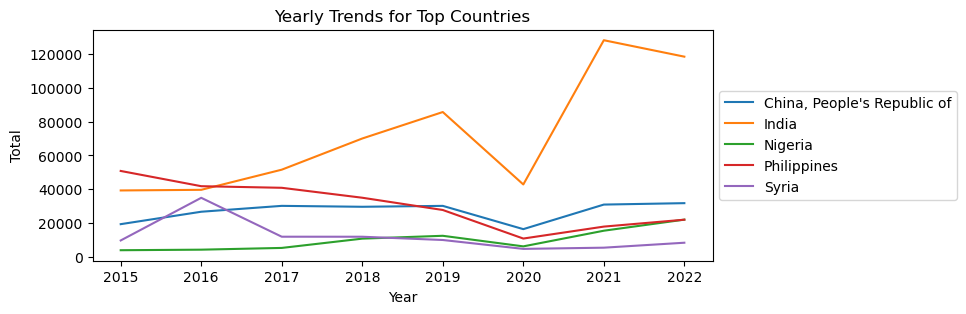

In [40]:
plt.figure(figsize=(8, 3))
sns.lineplot(x='Year', y='Total', hue='Country', data=df_top_5_countries)
plt.title('Yearly Trends for Top Countries')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside the plot
plt.show()


### Feature Importance & Split test

In [41]:
data = pd.read_excel('master_data.xlsx')
data.head().T

#data.shape
#(8,37)

,0,1,2,3,4
Province,Alberta,Alberta,Alberta,Alberta,Alberta
Year,2016,2017,2018,2019,2020
Business_Immigration,20,15,50,95,35
Protected_Person_in_Canada,925,1230,1470,1295,1020
Provincial_Nominee_Program,8070,7195,10270,11235,7825
Resettled_Refugee,6285,3690,4230,5680,1625
Sponsored_Family_Immigration,13015,14255,13930,15295,7560
Temp_Resident_to_Permanent_Resident,0,0,0,0,0
Worker_Program,20340,15160,11390,9425,4520
Administrative and Support Services,1805,1515,1875,1920,1665


In [42]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Business_Immigration,72.0,5.400000e+02,1.303801e+03,0.00,5.000000e+00,20.00,298.75,5860.0
Protected_Person_in_Canada,72.0,2.336806e+03,4.906920e+03,5.00,3.875000e+01,220.00,2288.75,27375.0
Provincial_Nominee_Program,72.0,6.815347e+03,5.396986e+03,0.00,2.163750e+03,6627.50,11006.25,20465.0
Resettled_Refugee,72.0,3.509097e+03,4.577999e+03,110.00,7.550000e+02,1730.00,4273.75,20110.0
Sponsored_Family_Immigration,72.0,9.226736e+03,1.224153e+04,140.00,6.962500e+02,2610.00,13903.75,52265.0
Temp_Resident_to_Permanent_Resident,72.0,1.345625e+03,3.910506e+03,0.00,0.000000e+00,0.00,760.00,21795.0
Worker_Program,72.0,1.273681e+04,1.907643e+04,195.00,8.637500e+02,2227.50,15753.75,94610.0
Administrative and Support Services,72.0,2.047847e+03,2.141511e+03,10.00,5.250000e+02,1302.50,3050.00,8760.0
"Art, Culture, and Media Professionals",72.0,2.293056e+02,3.293328e+02,0.00,5.000000e+00,32.50,467.50,1260.0
Business and Financial Managers,72.0,5.335417e+02,8.342832e+02,0.00,4.375000e+01,212.50,565.00,3890.0


In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming 'data' is your DataFrame
# Assuming 'target_column' is the column you want to predict, e.g., 'Average HPI'

# Drop non-numeric columns if any
numeric_data = data.select_dtypes(include=['int', 'float'])

# Separate features and target variable
X = numeric_data.drop(columns=['Average HPI'])  # Features
y = numeric_data['Average HPI']  # Target variable

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

top_15_features = feature_importances.head(15)
top_15_features

,Importance
Inflation Rate,0.918815
Mortgage Rate,0.036784
Temp_Resident_to_Permanent_Resident,0.035974
COVID_era,0.006209
Population,0.001107
Worker_Program,0.000456
Education and Teaching Professionals,0.000223
Manufacturing Management,0.000128
Resettled_Refugee,0.000123
Sales and Services Supervisors,0.000059


In [44]:
# Rename columns
renamed_columns = {
    'Province': 'Province',
    'Paralegals and Social Service Workers': 'Paralegals and Social Service Workers',
    'Inflation Rate': 'Inflation Rate',
    'Mortgage Rate': 'Mortgage Rate',
    'Temp_Resident_to_Permanent_Resident': 'Temp Resident to Permanent Resident',
    'Population': 'Population',
    'Resettled_Refugee': 'Resettled Refugee',
    'Worker_Program': 'Worker Program',
    'Construction and Equipment Operations': 'Construction and Equipment Operations',
    'Vacancy Rate': 'Vacancy Rate',
    'COVID_era': 'COVID Indicator',
    'Business_Immigration': 'Business Immigration',
    'Construction and Facility Management': 'Construction and Facility Management',
    'Transportation and Natural Resources Management': 'Transportation and Natural Resources Management'
}

# Rename columns in the DataFrame
data = data.rename(columns=renamed_columns)

# Selecting features and target
selected_columns = ['Province', 'Paralegals and Social Service Workers', 'Inflation Rate', 'Mortgage Rate', 
                    'Temp Resident to Permanent Resident', 'Population', 'Resettled Refugee', 
                    'Worker Program', 'Construction and Equipment Operations', 'Vacancy Rate', 
                    'COVID Indicator', 'Business Immigration', 'Construction and Facility Management', 
                    'Transportation and Natural Resources Management']

# Selecting only the specified columns as features
X = data[selected_columns]
X.head()


,Province,Paralegals and Social Service Workers,Inflation Rate,Mortgage Rate,Temp Resident to Permanent Resident,Population,Resettled Refugee,Worker Program,Construction and Equipment Operations,Vacancy Rate,COVID Indicator,Business Immigration,Construction and Facility Management,Transportation and Natural Resources Management
0,Alberta,210,1.4,3.7,0,2117940,6285,20340,1315,2.6,0,20,135,35
1,Alberta,155,1.6,3.8,0,2119770,3690,15160,925,2.2,0,15,65,25
2,Alberta,140,2.3,4.3,0,2115995,4230,11390,455,1.5,0,50,60,20
3,Alberta,160,1.9,4.2,0,2112404,5680,9425,355,1.0,0,95,45,20
4,Alberta,130,0.7,3.7,0,2108894,1625,4520,190,1.7,1,35,55,15


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#print(X_train.shape)
#print(X_test.shape)
#(6, 14)
#(2, 14)

## Linear Regression

In [46]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['Province']),
                                      remainder = 'passthrough')
scaler = StandardScaler()
lr = LinearRegression()
pipe = make_pipeline(column_trans,scaler,lr)
pipe.fit(X_train,y_train)
y_pred_lr = pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

print(y_test)
print(y_pred_lr)

26    103.22
27    103.15
48     98.64
22    125.10
30    125.10
51    103.15
7     124.81
59    103.15
34    103.22
71    124.81
56     98.64
28    105.30
31    124.81
42    103.22
33    102.16
Name: Average HPI, dtype: float64
[106.08052733 104.8352886  101.78207887 127.45747533 129.31028495
 100.19751174 123.50222796 102.71637859 104.34997814 123.86089264
 100.08448329 108.73226421 123.71921533 103.909839   100.71322483]


C:\Users\nehak\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



## Lasso Regression

In [47]:
lasso = Lasso()
pipe = make_pipeline(column_trans,scaler,lasso)
pipe.fit(X_train,y_train)
y_pred_lasso =pipe.predict(X_test)
print(r2_score(y_test,y_pred_lasso))

print(y_test)
print(y_pred_lasso)

0.9423301935724756
26    103.22
27    103.15
48     98.64
22    125.10
30    125.10
51    103.15
7     124.81
59    103.15
34    103.22
71    124.81
56     98.64
28    105.30
31    124.81
42    103.22
33    102.16
Name: Average HPI, dtype: float64
[104.74135685 103.54979798 101.27246137 125.48023975 125.48023975
 103.54979798 119.93973476 103.54979798 104.74135685 119.93973476
 101.27246137 107.99180324 119.93973476 104.74135685 101.97329254]


C:\Users\nehak\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Ridge Regression

In [48]:
ridge = Ridge()
pipe = make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)
y_pred_ridge =pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

print(y_test)
print(y_pred_ridge)

26    103.22
27    103.15
48     98.64
22    125.10
30    125.10
51    103.15
7     124.81
59    103.15
34    103.22
71    124.81
56     98.64
28    105.30
31    124.81
42    103.22
33    102.16
Name: Average HPI, dtype: float64
[106.13254198 104.92477886 100.08798362 127.04179323 128.75006805
 100.96732719 122.62957524 102.91074476 104.59501733 122.89864838
 100.05779151 108.84899496 123.42282618 104.17138997 100.94292397]


C:\Users\nehak\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



### Comparision among models

In [49]:
print("No Regularization: ",r2_score(y_test,y_pred_lr))
print("Lasso: ",r2_score(y_test,y_pred_lasso))
print("Ridge: ",r2_score(y_test,y_pred_ridge))

No Regularization:  0.9569838880162462
Lasso:  0.9423301935724756
Ridge:  0.9626003064917552


# Deployment 

In [50]:
#!pip install streamlit

In [51]:
import joblib

joblib.dump(pipe, 'lasso_pipeline.joblib')


['lasso_pipeline.joblib']